# Getting Started

This notebook showcases basic functionality of the code base.

Here, we load the metadata, an example dataset, and run inference using a pre-trained model. 

We also show how to visualize the joint angle predictions using a hand mesh (requires the UmeTrack package -- see README.md).

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pathlib import Path
DATA_DOWNLOAD_DIR = Path(r'F:\emg2pose')

## Download Dataset Metadata

In [5]:
import pandas as pd

metadata_df = pd.read_csv(DATA_DOWNLOAD_DIR / "emg2pose_metadata.csv")
metadata_df.head(5)

,session,user,stage,start,end,side,filename,moving_hand,held_out_user,held_out_stage,split,generalization
0,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
1,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ThumbsUpDownThumbRotationsCWCCWP,1.649400e+09,1.649400e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
2,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
3,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,HandClawGraspFlicks,1.649401e+09,1.649401e+09,right,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,False,val,user
4,2022-04-07-1649318400-8125c-cv-emg-pose-train@2,29ddab35d7,ShakaVulcanPeace,1.649401e+09,1.649401e+09,left,2022-04-07-1649318400-8125c-cv-emg-pose-train@...,both,True,True,val,user_stage


## Download a Smaller (~600 MiB) Version of the Dataset

In [6]:

sessions = sorted(glob.glob(os.path.join(DATA_DOWNLOAD_DIR, "emg2pose_dataset_mini/*.hdf5")))
sessions

['F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-10_left.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-10_right.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-11_left.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-11_right.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-12_left.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-12_right.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_left.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right.hdf5',
 'F:\\emg2pose\\emg2pose_dataset_mini\\2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-14_

## Let's Look at a Dataset

In [7]:
from emg2pose.data import Emg2PoseSessionData

session = sessions[15]
data = Emg2PoseSessionData(hdf5_path=session)

In [8]:
print(data.fields)
print()

print(f"{'emg shape: ':<20} {data['emg'].shape}")
print(f"{'joint_angles shape: ':<20} {data['joint_angles'].shape}")
print(f"{'time shape: ':<20} {data['time'].shape}")

dict_keys(['time', 'joint_angles', 'emg'])

emg shape:           (119116, 16)
joint_angles shape:  (119116, 20)
time shape:          (119116,)


In [ ]:
metadata_df[metadata_df["filename"] == data.metadata["filename"]]

,session,user,stage,start,end,side,filename,moving_hand,held_out_user,held_out_stage,split,generalization
25238,2022-12-06-1670313600-e3096-cv-emg-pose-train@2,d387095792,CountingUpDownFaceSideAway,1.670313e+09,1.670313e+09,right,2022-12-06-1670313600-e3096-cv-emg-pose-train@...,both,True,True,val,user_stage


<Axes: title={'center': '2022-12-06-1670313600-e3096-cv-emg-pose-train@2\nCountingUpDownFaceSideAway'}>

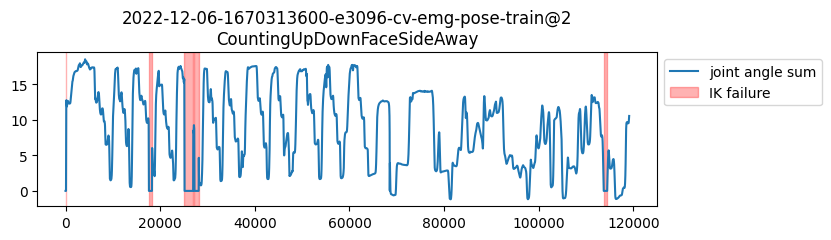

In [ ]:
import emg2pose.visualization as visualization

visualization.ik_failure_plot(data)

In [ ]:
from emg2pose.utils import downsample
import numpy as np

joint_angles = data["joint_angles"]
joint_angles_30hz = downsample(joint_angles, native_fs=2000, target_fs=30)

assert not np.any(np.isnan(joint_angles_30hz))

visualization.plot_hand_mesh(joint_angles_30hz[100], auto_range=False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'color': 'lightpink',
              'i': array([  3.,   3., 297., ..., 724., 756., 756.], dtype=float32),
              'j': array([  0.,   1., 299., ..., 778., 288., 779.], dtype=float32),
              'k': array([  1.,   2., 298., ..., 786., 779., 787.], dtype=float32),
              'lighting': {'ambient': 0.85, 'diffuse': 0.2, 'roughness': 1.0, 'specular': 0.5},
              'lightposition': {'x': 10, 'y': -500, 'z': -1},
              'opacity': 1.0,
              'type': 'mesh3d',
              'x': array([ 20.03017  ,  18.215006 ,   2.8473892, ..., -11.293713 , -12.086081 ,
                          -12.103909 ], dtype=float32),
              'y': array([ 16.296917,  16.588228,  21.13447 , ..., -17.59358 , -21.385607,
                          -21.36029 ], dtype=float32),
              'z': array([ -3.2354708 ,  -8.057361  ,  -8.322214  , ..., -20.048445  ,
                            0.45825154,  -5.0183473 ], dtype=float32)}],
    'layout': {'height': 600,
               'scene': {'aspectmode': 'manual',
                         'aspectratio': {'x': 1.0, 'y': 0.6363636363636364, 'z': 0.7727272727272727},
                         'camera': {'eye': {'x': -0.25, 'y': -0.9, 'z': 0.3}, 'projection': {'type': 'perspective'}},
                         'xaxis': {'range': [-20, 200],
                                   'showbackground': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'showticklabels': False,
                                   'title': {'text': ''},
                                   'zeroline': False},
                         'yaxis': {'range': [-100, 40],
                                   'showbackground': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'showticklabels': False,
                                   'title': {'text': ''},
                                   'zeroline': False},
                         'zaxis': {'range': [-70, 100],
                                   'showbackground': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'showticklabels': False,
                                   'title': {'text': ''},
                                   'zeroline': False}},
               'template': '...',
               'width': 800}
})

In [ ]:
import numpy as np


import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [ ]:
visualization.get_plotly_animation_for_joint_angles(joint_angles_30hz[0:250])

### Render the Plotly Animation to Video Frames

In [ ]:
import mediapy

frames = visualization.joint_angles_to_frames_parallel(joint_angles_30hz[0:250])
frames = visualization.remove_alpha_channel(frames)
mediapy.show_video(frames, width=800, fps=30, downsample=True)

## Let's Load a Checkpoint and Generate some Predictions

In [ ]:
!cd {DATA_DOWNLOAD_DIR} \
&& curl "https://fb-ctrl-oss.s3.amazonaws.com/emg2pose/emg2pose_model_checkpoints.tar.gz" -o emg2pose_model_checkpoints.tar.gz && \
tar -xvzf emg2pose_model_checkpoints.tar.gz

In [ ]:
from emg2pose.utils import generate_hydra_config_from_overrides

config = generate_hydra_config_from_overrides(
    overrides=[
        "experiment=tracking_vemg2pose",
        f"checkpoint={DATA_DOWNLOAD_DIR}/emg2pose_model_checkpoints/regression_vemg2pose.ckpt"
    ]
)

In [ ]:
from emg2pose.lightning import Emg2PoseModule

module = Emg2PoseModule.load_from_checkpoint(
    config.checkpoint,
    network=config.network,
    optimizer=config.optimizer,
    lr_scheduler=config.lr_scheduler,
)

In [ ]:
session = data
start_idx = 0
stop_idx = 10_000

In [ ]:
import torch

session_window = session[start_idx:stop_idx]

# no_ik_failure is not a field so we slice separately
no_ik_failure_window = session.no_ik_failure[start_idx:stop_idx]

batch = {
    "emg": torch.Tensor([session_window["emg"].T]),  # BCT
    "joint_angles": torch.Tensor([session_window["joint_angles"].T]),  # BCT
    "no_ik_failure": torch.Tensor([no_ik_failure_window]),  # BT
}

preds, joint_angles, no_ik_failure = module.forward(batch)

# Algorithms that use the initial state for ground truth will do poorly
# when the first joint angles are missing!
if (joint_angles[:, 0] == 0).all():
    print(
        "Warning! Ground truth not available at first time step!"
    )

# BCT --> TC (as numpy)
preds = preds[0].T.detach().numpy()
joint_angles = joint_angles[0].T.detach().numpy()

In [ ]:
preds.shape

In [ ]:
joint_angles.shape

In [ ]:
joint_angles_30hz = downsample(joint_angles, native_fs = 2000, target_fs = 30)
visualization.get_plotly_animation_for_joint_angles(joint_angles_30hz[0:250], color="gray")

In [ ]:
preds_30hz = downsample(preds, native_fs=2000, target_fs=30)
visualization.get_plotly_animation_for_joint_angles(preds_30hz[0:250], color="lightpink")

### Compare the Ground Truth and Predictions Side-by-Side

In [ ]:
gt_frames = visualization.joint_angles_to_frames_parallel(joint_angles_30hz[0:250], color="gray")
pred_frames = visualization.joint_angles_to_frames_parallel(preds_30hz[0:250], color="lightpink")

gt_frames = visualization.remove_alpha_channel(gt_frames)
pred_frames = visualization.remove_alpha_channel(pred_frames)

In [ ]:
mediapy.show_videos(dict(gt=gt_frames, pred=pred_frames), width=400, fps=30, downsample=True)

In [ ]:
N_COLS = 2
N_ROWS = 10

fig, axs = plt.subplots(N_ROWS, N_COLS, figsize=(4*N_COLS, 2*N_ROWS))

axs_flattened = axs.flatten()
for i, ax in enumerate(axs_flattened):
    ax.set_title(f"Joint Angle {i}")
    ax.plot(joint_angles_30hz[:, i], label="gt")
    ax.plot(preds_30hz[:, i], label="pred")

    ax.legend()

fig.suptitle("Predicted vs. Ground Truth Joint Angles")

plt.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()